# Sampling Method

Inspired by [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers) by Jake VanderPlas

Let's say you have 2 sets of test scores:  
    
    84, 72, 57, 46, 63, 76, 99, 91 
    
and  
    
    81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69  
    
The mean of the first set of test scores is 73.5 and the mean of the second set of test scores is 66.9.  
The difference between the 2 means is 6.6.

Is this difference statistically significant?

In [86]:
%matplotlib inline
import pandas as pd
import numpy as np    # library to allow us to use vectorized datastructures
import matplotlib.pyplot as plt

test1 = [
    84, 72, 57, 46, 63, 76, 99, 91
]

test2 = [
    81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69
]

test_scores1 = np.array(test1)
test_scores2 = np.array(test2)

### Test score set 1 mean:

In [87]:
test_scores1.mean()

73.5

### Test score set 2 mean:

In [88]:
test_scores2.mean()

66.916666666666671

In [89]:
diff = test_scores1.mean() - test_scores2.mean()
diff

6.5833333333333286

### Is the difference in the means statistically significant?

In [90]:
combined = np.concatenate((test_scores1, test_scores2))

In [91]:
combined

array([84, 72, 57, 46, 63, 76, 99, 91, 81, 69, 74, 61, 56, 87, 69, 65, 66,
       44, 62, 69])

In [92]:
diff_means = []

In [93]:
for i in range(10000):
    diff_means.append(np.random.choice(combined, size=len(test_scores1), replace=True).mean()
                      - np.random.choice(combined, size=len(test_scores2), replace=True).mean()
                     )

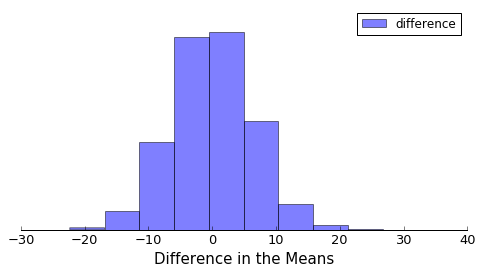

In [110]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.hist(diff_means, alpha=.5, label='difference')
plt.legend(loc='best')
plt.xlabel('Difference in the Means', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=13)
ax.get_yaxis().set_ticks([])
plt.show()

In [95]:
df = pd.DataFrame({'means':diff_means})

In [103]:
df.describe()

,means
count,10000.000000
mean,0.006396
std,6.341021
min,-22.333333
25%,-4.291667
50%,-0.083333
75%,4.291667
max,32.208333


In [96]:
criteria = df.means > 6.6
len(df[criteria])

1506

In [97]:
from scipy.stats import norm

In [104]:
norm.cdf(6.6, loc=0.006396, scale=6.341021)

0.85079129338975823

In [109]:
norm.cdf(0, loc=0, scale=1)

0.5

In [107]:
1-norm.cdf(6.6, loc=0.006396, scale=6.341021)

2.0557888724681561e-11

In [98]:
norm.cdf(6.6, )

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`

